In [1]:
from PyHessian.pyhessian.hessian import hessian
from PyHessian.density_plot import get_esd_plot
from hessian_utils import *
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets, transforms
# from keras.datasets import mnist
import matplotlib.pyplot as plt 
import time

# PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True
# How to do this?
import os

os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
%matplotlib inline


In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [3]:
mnist_trainset = datasets.MNIST(root='./data/mnist', train=True, download=True, transform=transforms.ToTensor())
mnist_fashion_trainset = datasets.FashionMNIST(root='./data/fashion_mnist', train=True, download=True, transform=transforms.ToTensor())
cifar_trainset = datasets.CIFAR10(root='./data/cifar10', train=True, download=True, transform=transforms.ToTensor())
# Getting mnist test data
mnist_testset = datasets.MNIST(root='./data/mnist', train=False, download=True, transform=transforms.ToTensor())
mnist_fashion_testset = datasets.FashionMNIST(root='./data/fashion_mnist', train=False, download=True, transform=transforms.ToTensor())
cifar_testset = datasets.CIFAR10(root='./data/cifar10', train=False, download=True, transform=transforms.ToTensor())

torch.manual_seed(42)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
train_X = mnist_fashion_trainset.data
train_y = mnist_fashion_trainset.targets
test_X = mnist_fashion_testset.data
test_y = mnist_fashion_testset.targets

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(8, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.linear = nn.Sequential(
            nn.Linear(16*7*7, 16),
            nn.ReLU(),
            nn.Linear(16, 10)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(-1, 16*7*7)
        x = self.linear(x)
        return x

In [6]:
train_X = (torch.tensor(train_X, dtype=torch.float32)/255).unsqueeze(1).to(device)
test_X = (torch.tensor(test_X, dtype=torch.float32)/255).unsqueeze(1).to(device)
train_y = (torch.tensor(train_y, dtype=torch.int64)).to(device)
test_y = (torch.tensor(test_y, dtype=torch.int64)).to(device)
val_x = train_X[:1000]
val_y = train_y[:1000]
x_samples = train_X[:50]
y_samples = train_y[:50]

/tmp/ipykernel_40451/2590459394.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_X = (torch.tensor(train_X, dtype=torch.float32)/255).unsqueeze(1).to(device)
/tmp/ipykernel_40451/2590459394.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_X = (torch.tensor(test_X, dtype=torch.float32)/255).unsqueeze(1).to(device)
/tmp/ipykernel_40451/2590459394.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_y = (torch.tensor(train_y, dtype=torch.int64)).to(device)
/tmp/ipykernel_40451/2590459394.py:4: UserWarning: To copy const

In [7]:
dataloader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(train_X, train_y),
    batch_size=32, shuffle=True)
model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Epoch 0, step 0, train_loss 2.3249118328094482, test_loss 2.3094449043273926
Epoch 0, step 500, train_loss 0.7818763256072998, test_loss 0.6959095597267151
Epoch 0, step 1000, train_loss 0.546726405620575, test_loss 0.5497068762779236
Epoch 0, step 1500, train_loss 0.49882420897483826, test_loss 0.5030243992805481


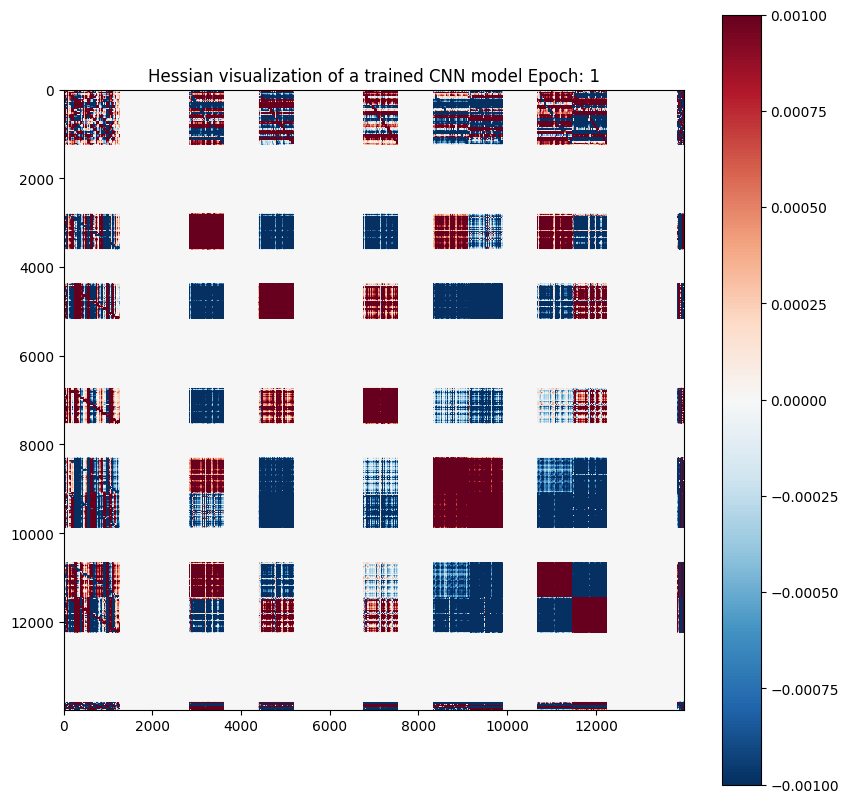

Epoch 1, step 0, train_loss 0.2893064618110657, test_loss 0.48941293358802795
Epoch 1, step 500, train_loss 0.45899662375450134, test_loss 0.4632221758365631
Epoch 1, step 1000, train_loss 0.3850875496864319, test_loss 0.4294166564941406
Epoch 1, step 1500, train_loss 0.45890921354293823, test_loss 0.49312934279441833


<Figure size 640x480 with 0 Axes>

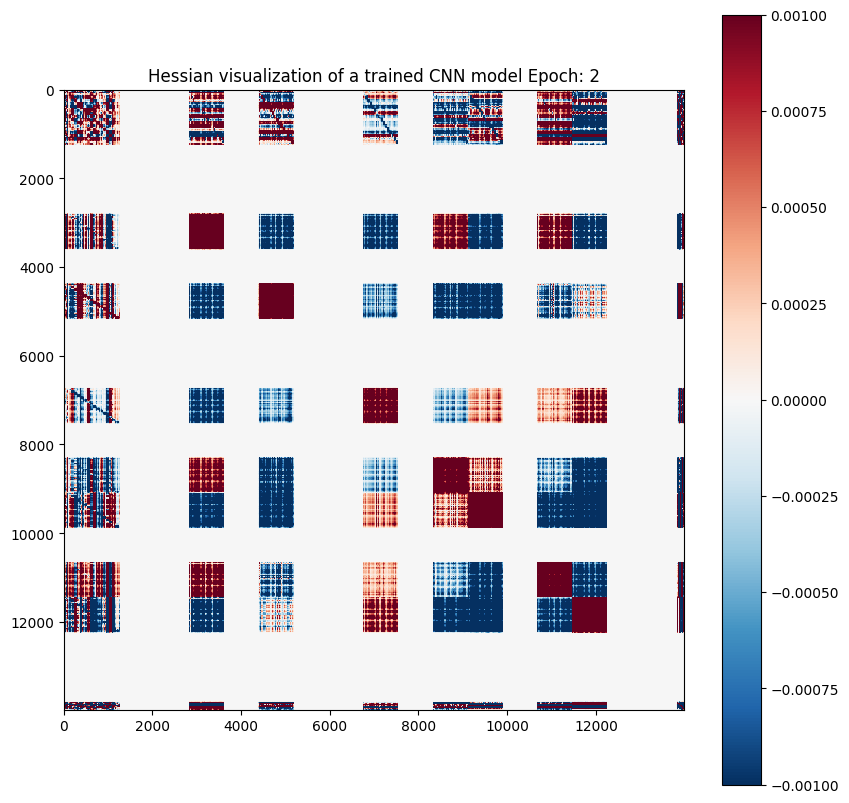

Epoch 2, step 0, train_loss 0.40944814682006836, test_loss 0.41219672560691833
Epoch 2, step 500, train_loss 0.700736403465271, test_loss 0.40037596225738525
Epoch 2, step 1000, train_loss 0.5989928245544434, test_loss 0.3981819748878479
Epoch 2, step 1500, train_loss 0.14013639092445374, test_loss 0.3869937062263489


<Figure size 640x480 with 0 Axes>

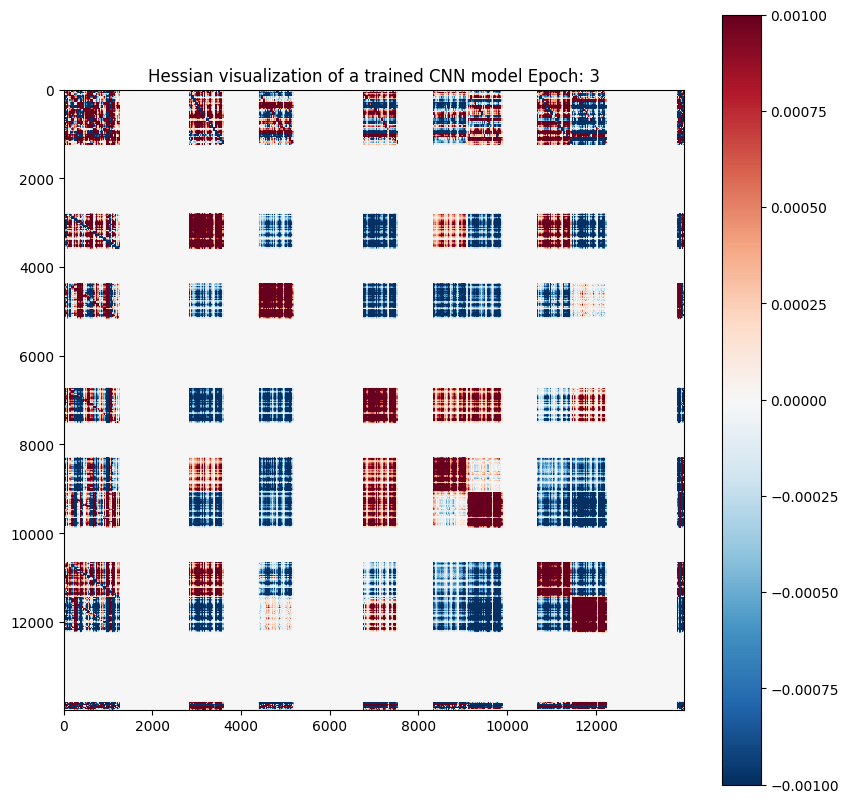

Epoch 3, step 0, train_loss 0.4367564022541046, test_loss 0.39064931869506836
Epoch 3, step 500, train_loss 0.5150348544120789, test_loss 0.39185845851898193
Epoch 3, step 1000, train_loss 0.3293406367301941, test_loss 0.366725355386734
Epoch 3, step 1500, train_loss 0.11629655212163925, test_loss 0.37040475010871887


<Figure size 640x480 with 0 Axes>

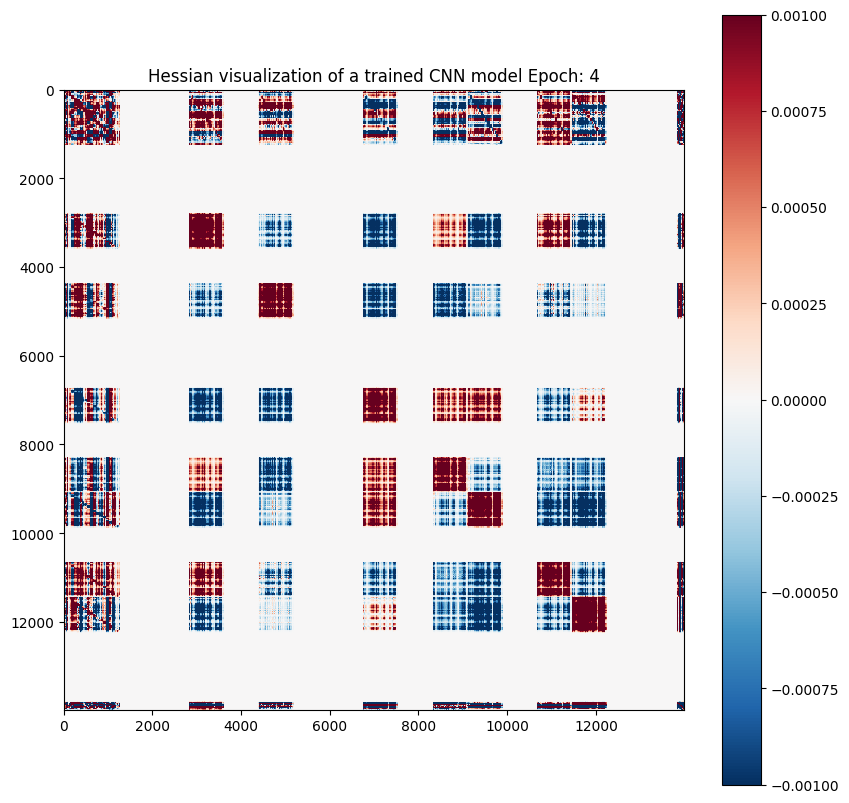

Epoch 4, step 0, train_loss 0.3842124044895172, test_loss 0.35664358735084534
Epoch 4, step 500, train_loss 0.11286849528551102, test_loss 0.36172571778297424
Epoch 4, step 1000, train_loss 0.532008171081543, test_loss 0.359833300113678
Epoch 4, step 1500, train_loss 0.4602220058441162, test_loss 0.3588738739490509


<Figure size 640x480 with 0 Axes>

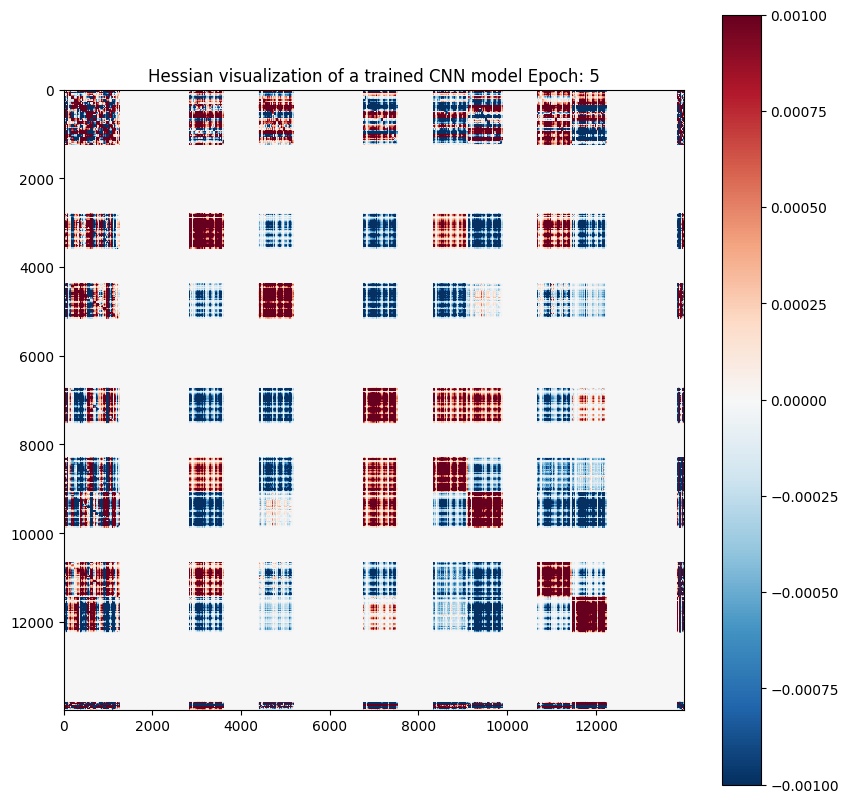

Epoch 5, step 0, train_loss 0.33752739429473877, test_loss 0.34301021695137024
Epoch 5, step 500, train_loss 0.4942361116409302, test_loss 0.34514373540878296
Epoch 5, step 1000, train_loss 0.2266588807106018, test_loss 0.335681676864624
Epoch 5, step 1500, train_loss 0.1865953654050827, test_loss 0.34703654050827026


<Figure size 640x480 with 0 Axes>

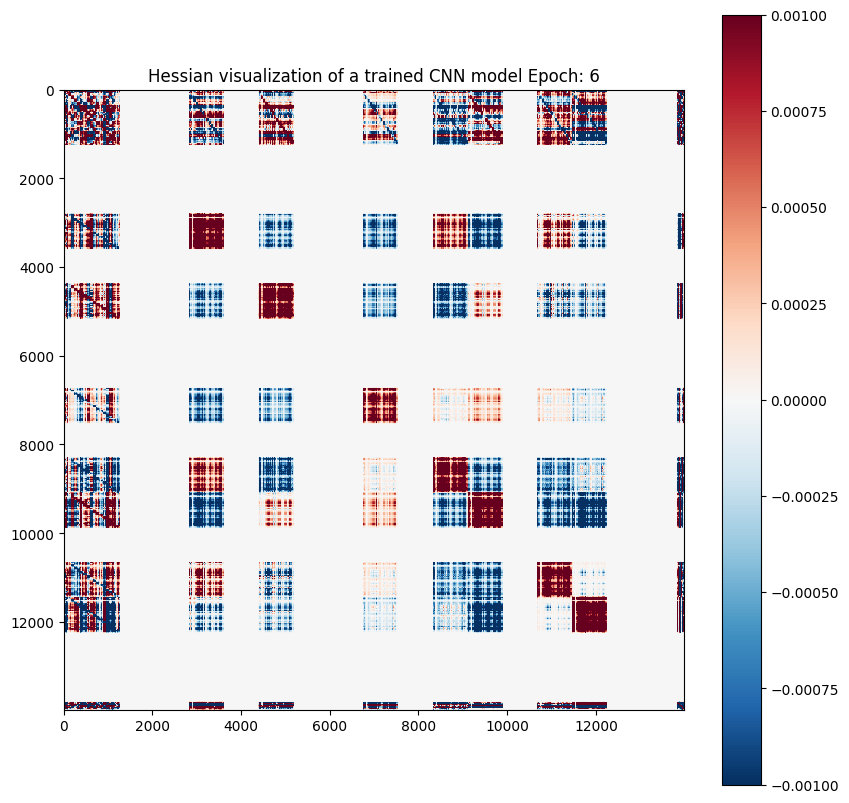

Epoch 6, step 0, train_loss 0.18652905523777008, test_loss 0.3412034809589386
Epoch 6, step 500, train_loss 0.27605482935905457, test_loss 0.328128844499588
Epoch 6, step 1000, train_loss 0.33526289463043213, test_loss 0.3253280818462372
Epoch 6, step 1500, train_loss 0.48134294152259827, test_loss 0.3425517678260803


<Figure size 640x480 with 0 Axes>

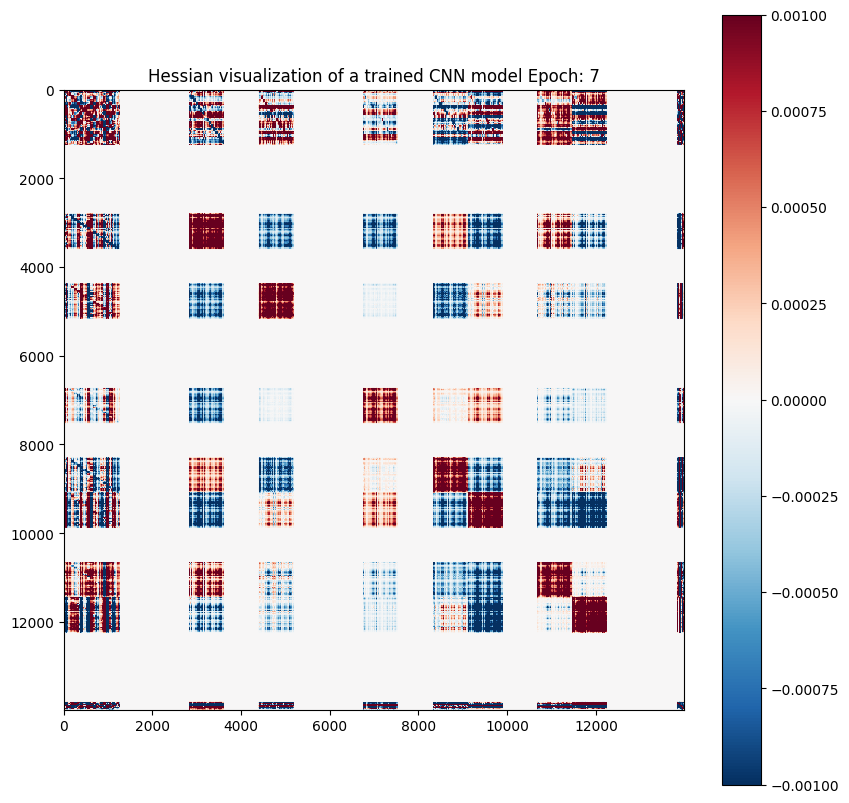

Epoch 7, step 0, train_loss 0.1748397946357727, test_loss 0.31981903314590454
Epoch 7, step 500, train_loss 0.24838212132453918, test_loss 0.32238826155662537
Epoch 7, step 1000, train_loss 0.34889766573905945, test_loss 0.32807013392448425
Epoch 7, step 1500, train_loss 0.2005724459886551, test_loss 0.31032490730285645


<Figure size 640x480 with 0 Axes>

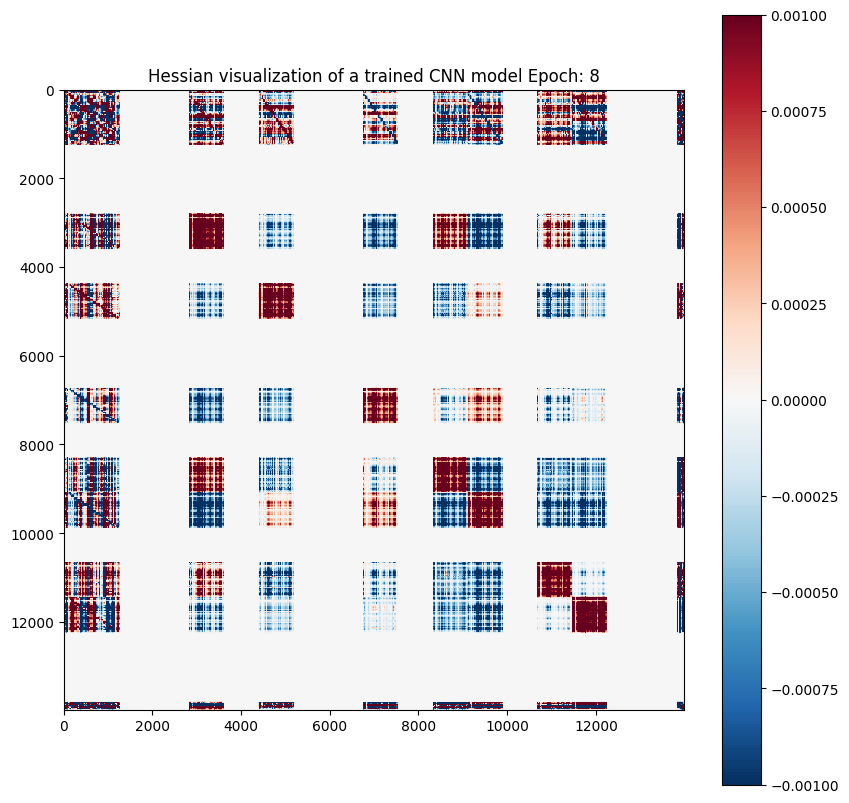

Epoch 8, step 0, train_loss 0.2708764672279358, test_loss 0.33821597695350647
Epoch 8, step 500, train_loss 0.22983242571353912, test_loss 0.31080853939056396
Epoch 8, step 1000, train_loss 0.12340479344129562, test_loss 0.3510235846042633
Epoch 8, step 1500, train_loss 0.47062796354293823, test_loss 0.3242734968662262


<Figure size 640x480 with 0 Axes>

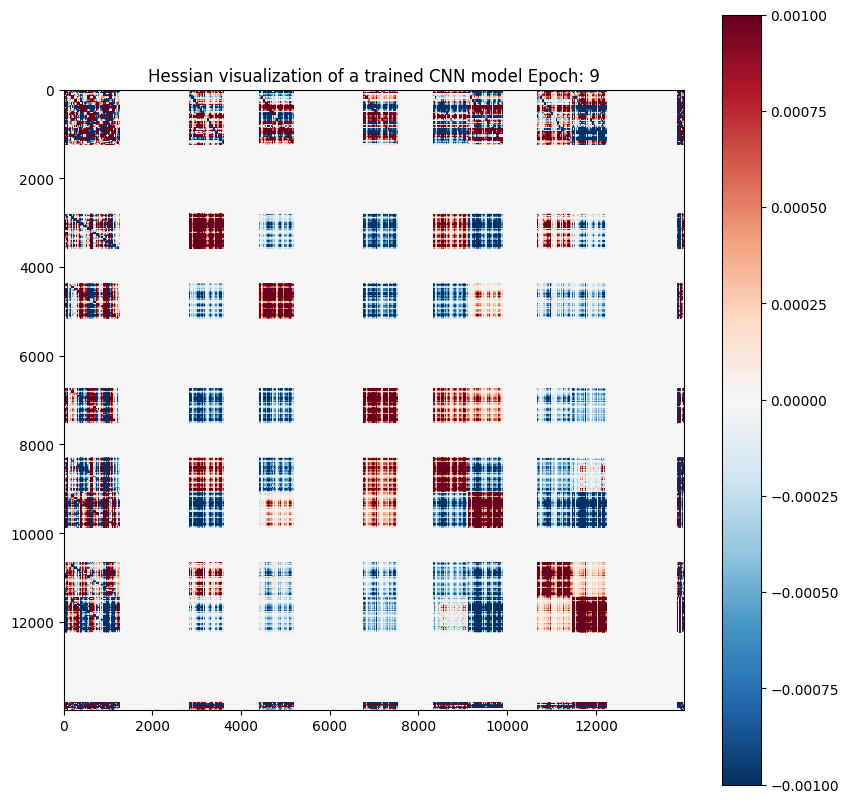

Epoch 9, step 0, train_loss 0.2335982322692871, test_loss 0.32271808385849
Epoch 9, step 500, train_loss 0.3161294460296631, test_loss 0.3136214315891266
Epoch 9, step 1000, train_loss 0.3339841067790985, test_loss 0.31250929832458496
Epoch 9, step 1500, train_loss 0.2682506740093231, test_loss 0.3007518947124481


<Figure size 640x480 with 0 Axes>

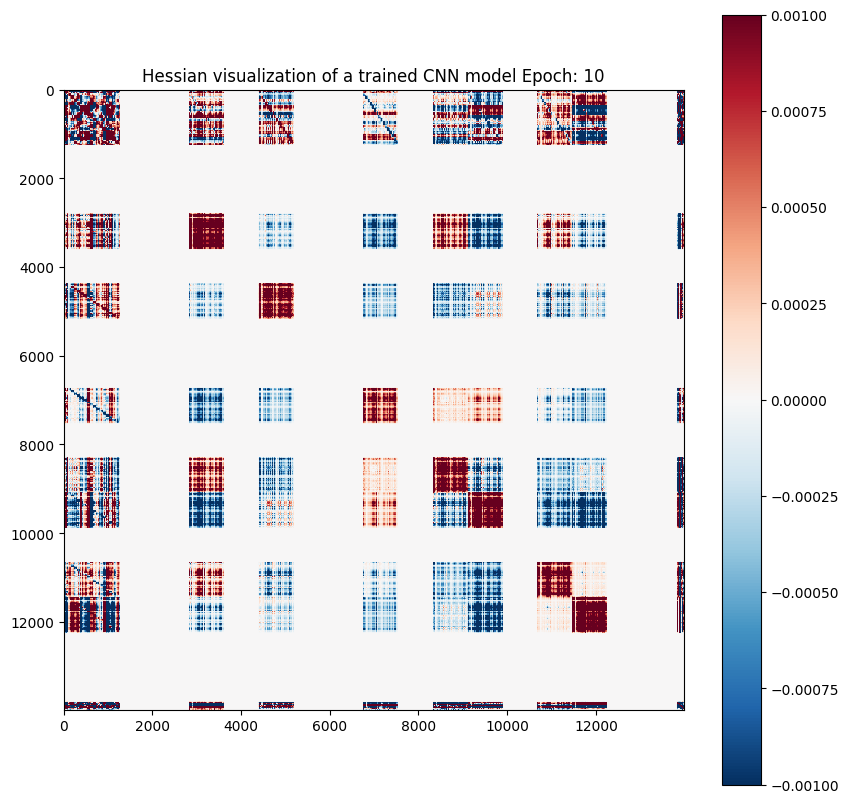

Epoch 10, step 0, train_loss 0.14366795122623444, test_loss 0.30461385846138
Epoch 10, step 500, train_loss 0.21909105777740479, test_loss 0.33172479271888733
Epoch 10, step 1000, train_loss 0.2270432561635971, test_loss 0.30985718965530396
Epoch 10, step 1500, train_loss 0.4360324442386627, test_loss 0.30719447135925293


<Figure size 640x480 with 0 Axes>

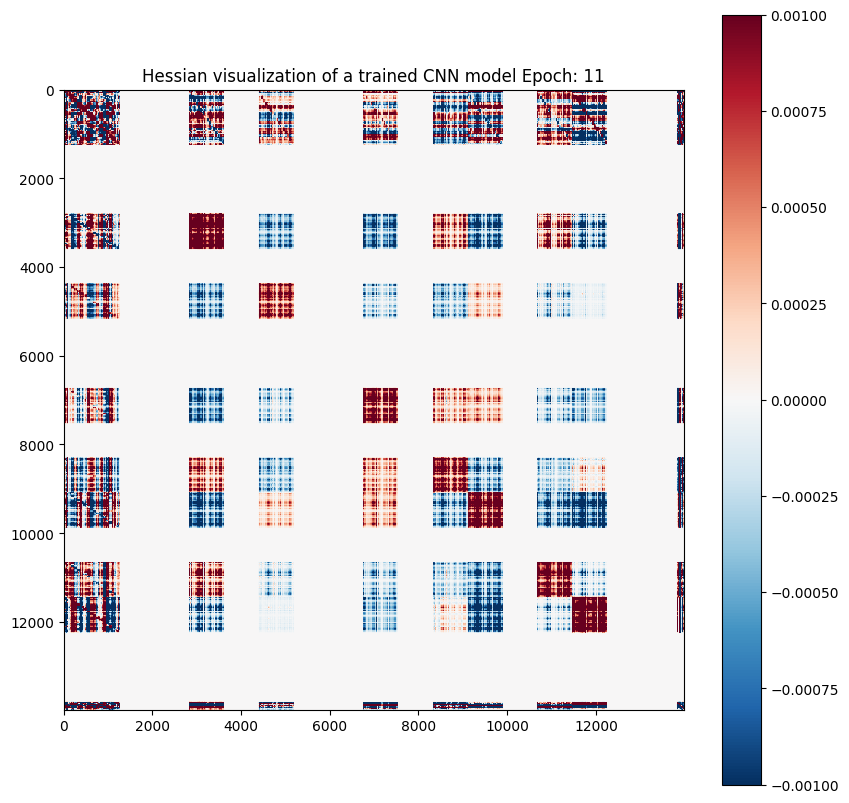

Epoch 11, step 0, train_loss 0.34625640511512756, test_loss 0.31010037660598755
Epoch 11, step 500, train_loss 0.6316617131233215, test_loss 0.30802464485168457
Epoch 11, step 1000, train_loss 0.25842955708503723, test_loss 0.3023422658443451
Epoch 11, step 1500, train_loss 0.20466595888137817, test_loss 0.3149721622467041


<Figure size 640x480 with 0 Axes>

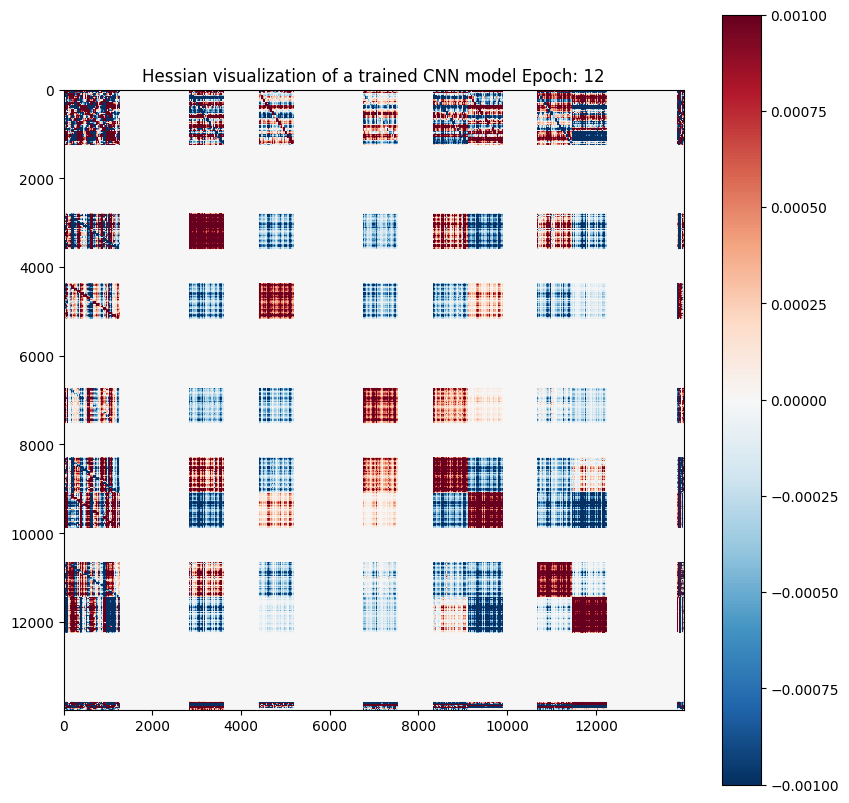

Epoch 12, step 0, train_loss 0.17269639670848846, test_loss 0.3260546028614044
Epoch 12, step 500, train_loss 0.3110821843147278, test_loss 0.30696573853492737
Epoch 12, step 1000, train_loss 0.3531566858291626, test_loss 0.300676554441452
Epoch 12, step 1500, train_loss 0.17701861262321472, test_loss 0.341339111328125


<Figure size 640x480 with 0 Axes>

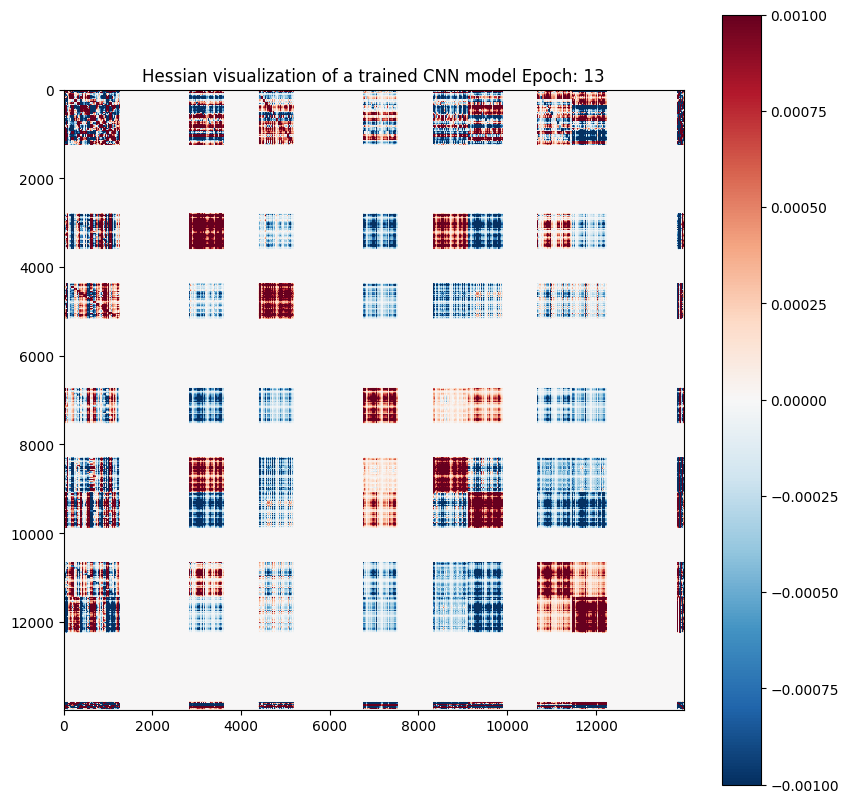

Epoch 13, step 0, train_loss 0.32961148023605347, test_loss 0.3022148013114929
Epoch 13, step 500, train_loss 0.09838234633207321, test_loss 0.2971830666065216
Epoch 13, step 1000, train_loss 0.31768280267715454, test_loss 0.3095276653766632
Epoch 13, step 1500, train_loss 0.14953309297561646, test_loss 0.2980315685272217


<Figure size 640x480 with 0 Axes>

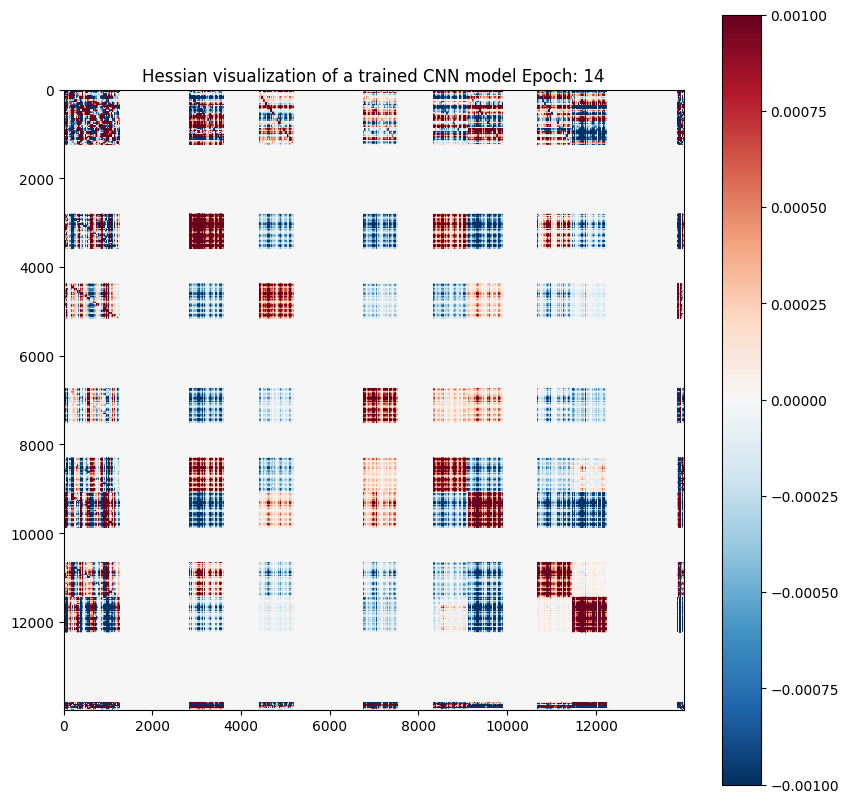

Epoch 14, step 0, train_loss 0.18091103434562683, test_loss 0.29798179864883423
Epoch 14, step 500, train_loss 0.055898167192935944, test_loss 0.3270319998264313
Epoch 14, step 1000, train_loss 0.46960732340812683, test_loss 0.2942868769168854
Epoch 14, step 1500, train_loss 0.14393635094165802, test_loss 0.2981608808040619


<Figure size 640x480 with 0 Axes>

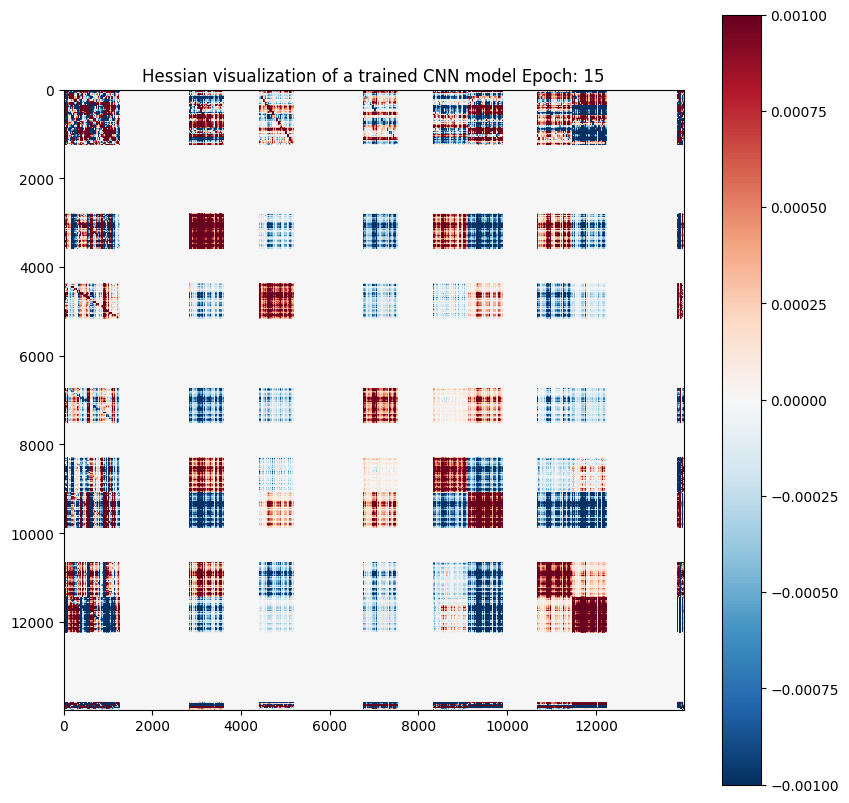

Epoch 15, step 0, train_loss 0.10333490371704102, test_loss 0.29842767119407654
Epoch 15, step 500, train_loss 0.5491119623184204, test_loss 0.30481648445129395
Epoch 15, step 1000, train_loss 0.5000070333480835, test_loss 0.29975199699401855
Epoch 15, step 1500, train_loss 0.17989106476306915, test_loss 0.2973455786705017


<Figure size 640x480 with 0 Axes>

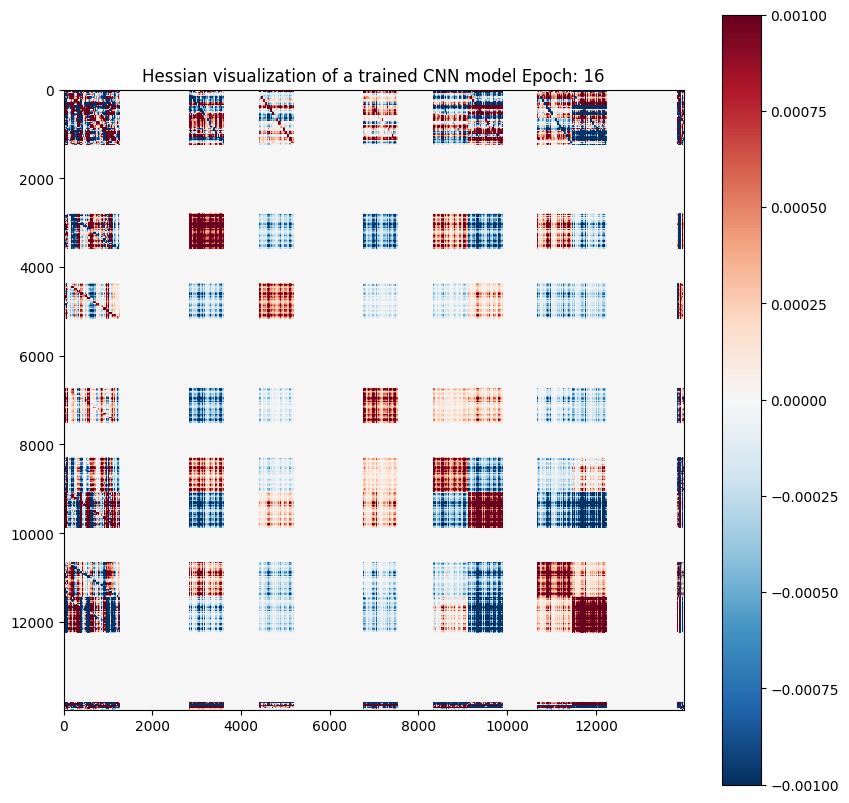

Epoch 16, step 0, train_loss 0.34768617153167725, test_loss 0.29618221521377563
Epoch 16, step 500, train_loss 0.2076815664768219, test_loss 0.3052518963813782
Epoch 16, step 1000, train_loss 0.28246384859085083, test_loss 0.30382367968559265
Epoch 16, step 1500, train_loss 0.35510629415512085, test_loss 0.30261290073394775


<Figure size 640x480 with 0 Axes>

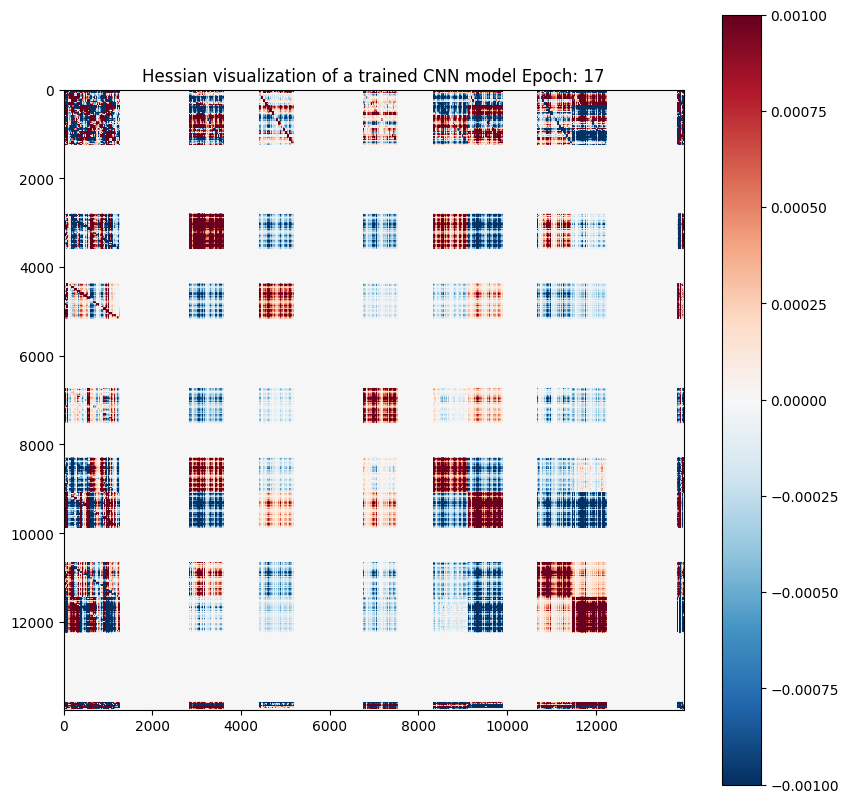

Epoch 17, step 0, train_loss 0.307022362947464, test_loss 0.30627596378326416
Epoch 17, step 500, train_loss 0.27758365869522095, test_loss 0.3010808229446411
Epoch 17, step 1000, train_loss 0.17820419371128082, test_loss 0.3037737011909485
Epoch 17, step 1500, train_loss 0.4591066837310791, test_loss 0.30572399497032166


<Figure size 640x480 with 0 Axes>

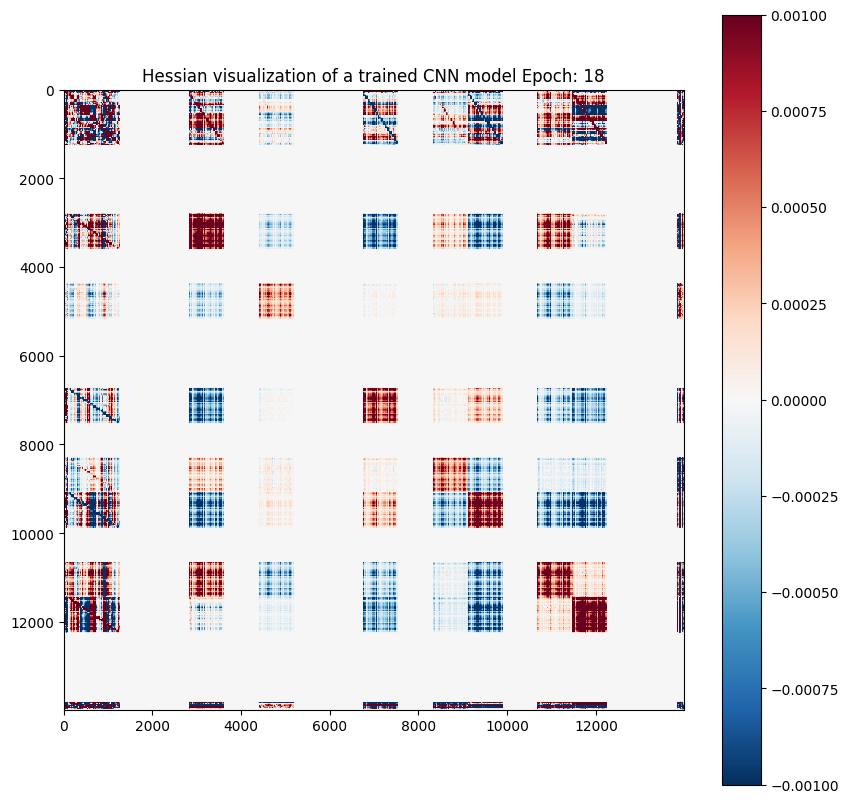

Epoch 18, step 0, train_loss 0.3423954248428345, test_loss 0.3276260793209076
Epoch 18, step 500, train_loss 0.2715030014514923, test_loss 0.302212119102478
Epoch 18, step 1000, train_loss 0.37957504391670227, test_loss 0.2927372455596924
Epoch 18, step 1500, train_loss 0.16371271014213562, test_loss 0.28771543502807617


<Figure size 640x480 with 0 Axes>

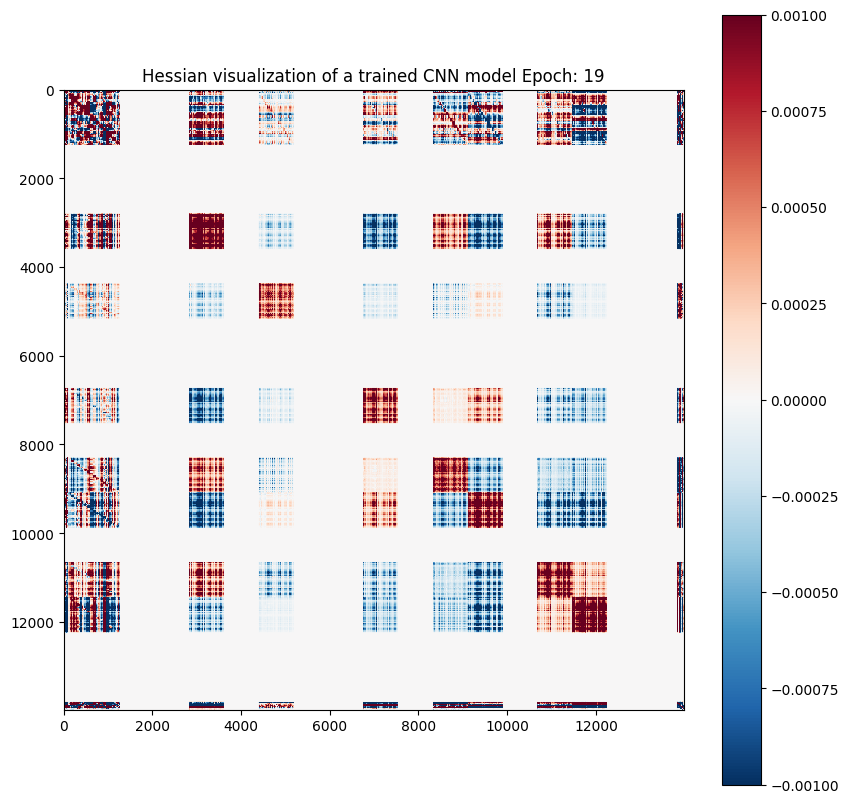

Epoch 19, step 0, train_loss 0.4749247431755066, test_loss 0.29685473442077637
Epoch 19, step 500, train_loss 0.28990697860717773, test_loss 0.30931684374809265
Epoch 19, step 1000, train_loss 0.1548025757074356, test_loss 0.2905259132385254
Epoch 19, step 1500, train_loss 0.21729353070259094, test_loss 0.2977535128593445


<Figure size 640x480 with 0 Axes>

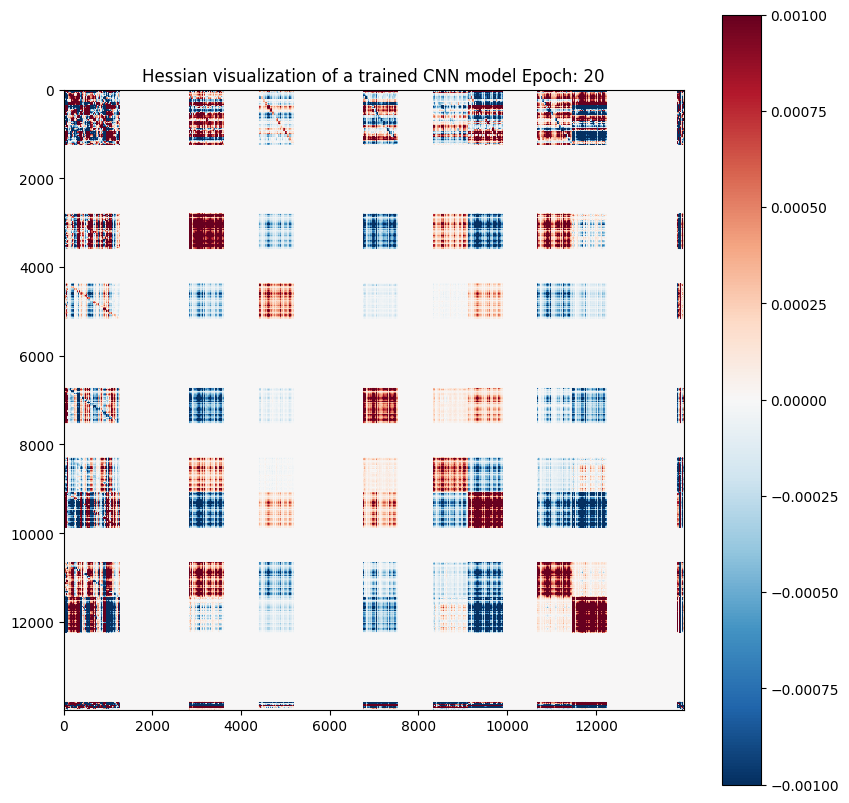

<Figure size 640x480 with 0 Axes>

In [8]:
losses = []
test_losses = []
train_losses = []
for epoch in range(20):
    for i, (data, target) in enumerate(dataloader):
        optimizer.zero_grad()
        output = model(data)
        #output_test = model(test_X)
        loss = criterion(output, target)
        # loss_test = criterion(output_test, test_y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if i % 500 == 0:
            output = model(val_x)
            loss_train = criterion(output, val_y)
            output = model(test_X)
            loss_test = criterion(output, test_y)
            print(f"Epoch {epoch}, step {i}, train_loss {loss.item()}, test_loss {loss_test.item()}")
            output_test = model(test_X)
            test_losses.append(loss_test.item())
            train_losses.append(loss_train.item())
    #print(loss.item())
    hess = compute_hessian(model, criterion, x_samples, y_samples)
    plt.figure(figsize=(10, 10))
    im = plt.imshow(hess, cmap='RdBu_r', vmin=-0.001, vmax=0.001)
    plt.title(f"Hessian visualization of a trained CNN model Epoch: {epoch+1}") 
    plt.colorbar(im)
    plt.show()
    plt.savefig(f"hessian_image_epoch_{epoch+1}.png")
    del hess
    


Test accuracy: 0.896


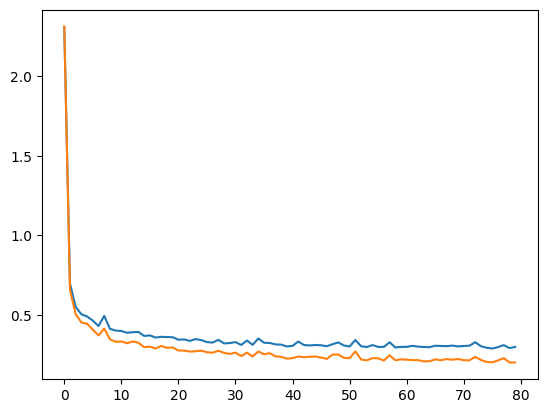

In [9]:
output = model(test_X)
_, predicted = torch.max(output, 1)
correct = (predicted == test_y).sum().item()
accuracy = correct / test_y.size(0)
print(f"Test accuracy: {accuracy}")
plt.plot(test_losses)
plt.plot(train_losses)
plt.show()

In [10]:
# Hessian computation


In [11]:
plt.figure(figsize=(10, 10))
im = plt.imshow(hess, cmap='RdBu_r', vmin=-0.001, vmax=0.001)
plt.title("Hessian visualization of a trained CNN model") 
plt.colorbar(im)
plt.show()
# plt.savefig("hessian.png")

NameError: name 'hess' is not defined

<Figure size 1000x1000 with 0 Axes>

In [ ]:
print(hess.max(), hess.min())

tensor(10.1429) tensor(-6.2332)
